___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz

## Ensemble Learning

This notebook covers these topics of the ensemble learning: 

* Comparison of hard and soft voting classifiers

* Bagging ensembles

* Feature importance example 

* Stacking ensemble 


# Setup

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Voting classifiers

In [2]:
# Use generated data set

# make_moons generate 2d binary classification datasets that are challenging to certain algorithms 
# including optional Gaussian noise.

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [4]:
np.mean(X[:,0])

0.5272175581735962

In [5]:
np.mean(X[:,1])

0.2580498754382393

In [6]:
np.unique(y)

array([0, 1])

## Compare hard and soft voting classifiers

### Hard voting

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

# hyperparameters (solver, n_estimators, gamma) 
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)


voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [8]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [9]:
from sklearn.metrics import accuracy_score


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,': ', accuracy_score(y_test, y_pred))

LogisticRegression :  0.864
RandomForestClassifier :  0.872
SVC :  0.888
VotingClassifier :  0.896


### Soft voting

In [10]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

# voting=soft
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,': ',  accuracy_score(y_test, y_pred))

LogisticRegression :  0.864
RandomForestClassifier :  0.872
SVC :  0.888
VotingClassifier :  0.912


# Bagging ensembles

In [12]:
# Bagging Decision Trees classifier (Bootstrap Aggregation) 
# estimators 500
# max. samples 100 

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [14]:
# Single Tree classifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


### Random Forests from DecisionTree classifier

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [16]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
# compare RF/DT results
np.sum(y_pred == y_pred_rf) / len(y_pred) * 100.

97.6

## Out-of-Bag evaluation

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)

bag_clf.fit(X_train, y_train)

print(bag_clf.oob_score_) 

0.8986666666666666


In [ ]:
# bag_clf.oob_decision_function_

## Feature importance
with MNIST

In [20]:
# import MNIST data set 

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)


In [21]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(n_estimators=10, random_state=42)

In [22]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.gray, interpolation="nearest")
    plt.axis("off")

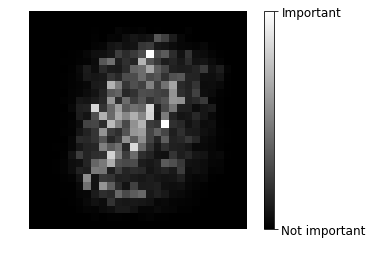

In [23]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Important'])

# save_fig("mnist_feature_importance_plot")
plt.show()

## Voting Classifier Exercize

Split MNIST data into a training set, a validation set, and a test set.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

Train various classifiers: Random Forest classifier, Extra-Trees classifier, SVM and Neural Network.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [56]:
# use n_estimators=10 
# random_state=42

random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42, verbose=1, max_iter=500) # may be a non-linear as well 
mlp_clf = MLPClassifier(random_state=42, verbose=1)         # default parameters hidden_layer_sizes=100 / 50 

In [57]:
# fit the models: takes while! 

# estimators = [random_forest_clf, extra_trees_clf, svm_clf , mlp_clf]
estimators = [random_forest_clf, extra_trees_clf, svm_clf]
# estimators = [svm_clf]

# train the estimatiors 
# TODO: parallelize (joblib) 
for estimator in estimators: 
    print(estimator)
    estimator.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)
ExtraTreesClassifier(n_estimators=10, random_state=42)
LinearSVC(random_state=42, verbose=1)
[LibLinear]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
# print the estimators score 

[estimator.score(X_val, y_val) for estimator in estimators]

[0.9469, 0.9492, 0.8695]

In [ ]:
[0.9469, 0.9492, 0.8695, 0.9663]

Combine them into an ensemble using a soft and hard voting classifier.

In [34]:
from sklearn.ensemble import VotingClassifier

In [35]:
named_estimators = [
    ('random_forest_clf', random_forest_clf), 
    ('extra_trees_clf', extra_trees_clf), 
    ('svm_clf', svm_clf), 
    ('mlp_clf', mlp_clf)
]

In [36]:
# n_jobs=-1

voting_clf = VotingClassifier(named_estimators)

In [38]:
# fit the voting classifier on X_train, y_train 
# takes while 

voting_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', LinearSVC(random_state=42)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [39]:
# print the voting score using the X_val, y_val
voting_clf.score(X_val, y_val)

0.9626

In [41]:
# what are the scores of the individual estimator? 
# voting_clf.estimators_ .. attribute to access any fitted sub-estimators by name.



In [ ]:
---

Remove SVM. Does it help to improve performance? 

In [42]:
# set the clf to None 
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('svm_clf', None),
                             ('mlp_clf', MLPClassifier(random_state=42))])

Update the list of estimators. 

In [47]:
# check 
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(n_estimators=10, random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(n_estimators=10, random_state=42)),
 ('svm_clf', None),
 ('mlp_clf', MLPClassifier(random_state=42))]

In [46]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42),
 MLPClassifier(random_state=42)]

In [45]:
# delete the estimator 
del voting_clf.estimators_[2]

Now let's evaluate the `VotingClassifier` again:

In [48]:
# Evaluate VotingClassifier again
voting_clf.score(X_val, y_val)

0.9649

In [ ]:
# A bit better? 

Try using a soft voting classifier. Do not  retrain the classifier, just set `voting` to `"soft"`:

In [49]:
voting_clf.voting = 'soft' 


In [50]:
# evaluate the score of the soft classifier! 
voting_clf.score(X_val, y_val)

0.9715

In [ ]:
# Improvement? 

In [ ]:
# Try it on the test set. How much better does it perform compared to the individual classifiers?

In [51]:
voting_clf.score(X_test, y_test) 

0.9693

In [52]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9437, 0.9474, 0.9636]

In [ ]:
# Did the voting classifier reduce the error rate?
# Compare it to the best model.  

## Stacking Ensemble

Exercise: _Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image's class. Train a classifier on this new training set._

In [59]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [60]:
X_val_predictions

array([[5., 5., 5.],
       [8., 8., 8.],
       [2., 2., 2.],
       ...,
       [7., 7., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [61]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

In [62]:
rnd_forest_blender.oob_score_

0.951

One can fine-tune this blender or try other types of blenders, then select the best one using cross-validation.

Exercise: the blender together with the classifiers form a stacking ensemble! 

Let's evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble's predictions. 

How does it compare to the voting classifier you trained earlier?

In [63]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [64]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred)

0.9505

In [ ]:
# How good is the stacking ensemble compare to the soft voting classifier? 